In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [86]:
df=pd.read_csv("Data.csv")

In [87]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### Check the shape and data types

In [88]:
df.shape

(129880, 24)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Check the duplicate values in the dataset

In [90]:
df.duplicated().sum()

0

### Check the null values

In [91]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

### Handling null values

In [92]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(0).astype(int)

In [93]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

### Check for non-numeric values in numerical columns and clean them

In [94]:
df['Flight Distance'].unique()

array(['821', '853', '1905', ..., 1161, 1051, 1376], dtype=object)

In [95]:
column = ['Flight Distance']
for i in column:
    if i in df.columns:
        # Remove unwanted characters (e.g., '$') and convert to numeric
        df[i] = df[i].replace('[^\d.]', '', regex=True).astype(int)

### Statistical data

In [96]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Encoding categorical data

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Satisfaction'] = label_encoder.fit_transform(df['Satisfaction'])
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [98]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1,3,...,3,4,4,5,4,3,3,3,3,1


### Target variable distribution

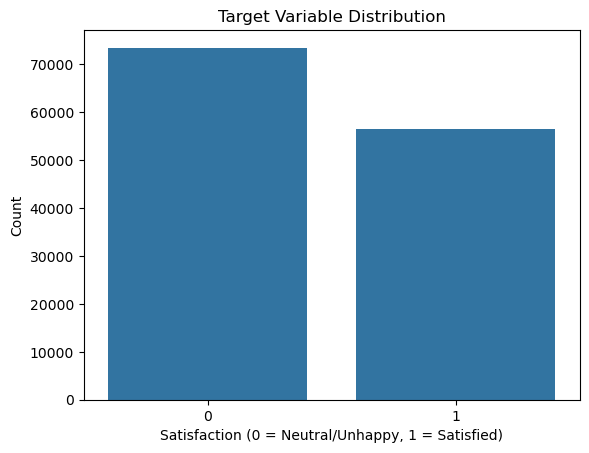

In [99]:
sns.countplot(x='Satisfaction', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Satisfaction (0 = Neutral/Unhappy, 1 = Satisfied)")
plt.ylabel("Count")
plt.show()

### Correlation heatmap

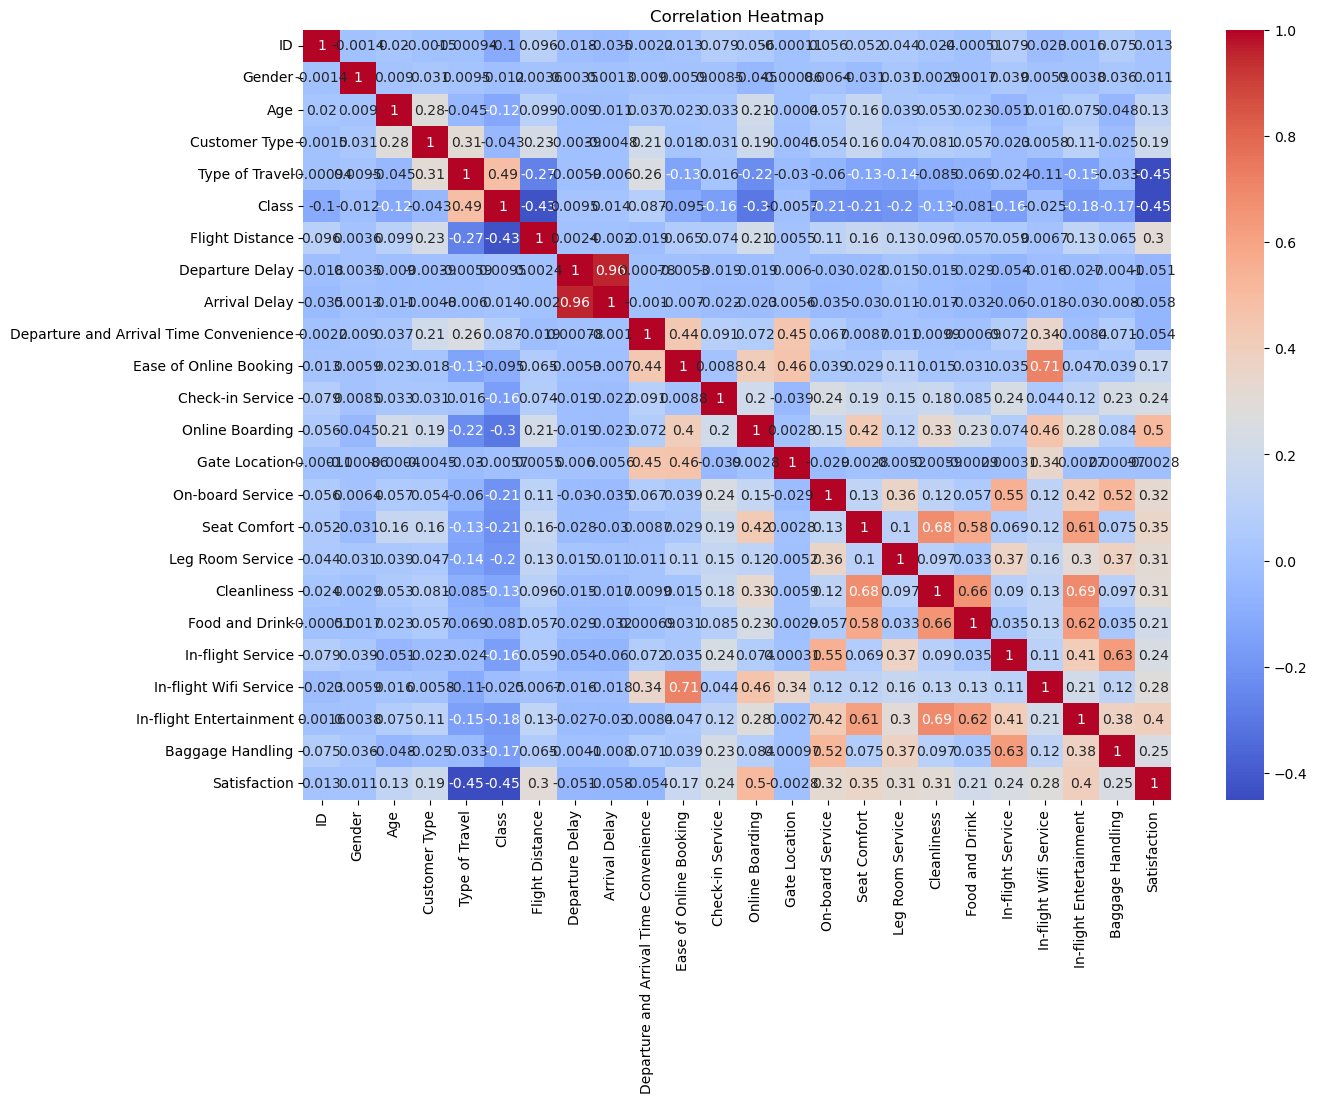

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

### Split data into features and target

In [100]:
x = df.drop('Satisfaction',axis=1)
y = df['Satisfaction']

### Splitting the dataset into training and testing data

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
y_pred1 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.8746920234062211
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



### SVC

In [107]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [108]:
y_pred2 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9562288266091777
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.94      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### knn

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred3 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.9308592546966431
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14723
           1       0.95      0.89      0.92     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### random forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
y_pred4 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))

Accuracy: 0.9633122882660918
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
y_pred5 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Classification Report:\n", classification_report(y_test, y_pred5))

Accuracy: 0.946181090237142
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     14723
           1       0.93      0.94      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.94      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



### gradient boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [116]:
y_pred6 = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Classification Report:\n", classification_report(y_test, y_pred6))

Accuracy: 0.9437557745611334
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14723
           1       0.95      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### compare which model is best

In [117]:
final_df=pd.DataFrame({'Models':['LR','SVC','KNN','RF','DT','GB'],
                       'Accuracy':[accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4),
                                   accuracy_score(y_test, y_pred5),
                                   accuracy_score(y_test, y_pred6)]})

In [118]:
final_df

,Models,Accuracy
0,LR,0.874692
1,SVC,0.956229
2,KNN,0.930859
3,RF,0.963312
4,DT,0.946181
5,GB,0.943756


<Axes: xlabel='Models', ylabel='Accuracy'>

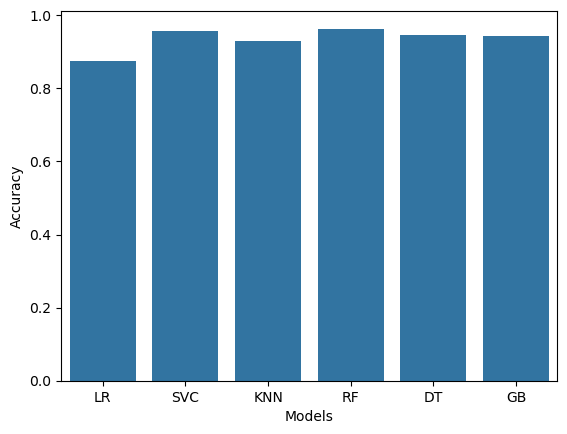

In [119]:
sns.barplot(x='Models', y='Accuracy', data=final_df)

In [121]:
df['Prediction'] = model.predict(scaler.transform(df.drop('Satisfaction', axis=1)))

In [122]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Prediction
0,1,1,48,0,0,0,821,2,5,3,...,5,2,5,5,5,3,5,5,0,0
1,2,0,35,1,0,0,821,26,39,2,...,4,5,5,3,5,2,5,5,1,1
2,3,1,41,1,0,0,853,0,0,4,...,5,3,5,5,3,4,3,3,1,1
3,4,1,50,1,0,0,1905,0,0,2,...,5,5,4,4,5,2,5,5,1,1
4,5,0,49,1,0,0,3470,0,1,3,...,4,4,5,4,3,3,3,3,1,1
5,6,1,43,1,0,0,3788,0,0,4,...,4,4,3,3,4,4,4,4,1,1
6,7,1,43,1,0,0,1963,0,0,3,...,5,5,4,5,5,3,5,5,1,1
7,8,0,60,1,0,0,853,0,3,3,...,4,4,4,4,3,4,3,3,1,1
8,9,1,50,1,0,0,2607,0,0,1,...,3,4,3,3,4,4,4,4,0,1
9,10,0,38,1,0,0,2822,13,0,2,...,4,5,4,2,5,2,5,5,1,1


### Identify key features influencing satisfaction

In [123]:
feature_importance = model.feature_importances_
features = x.columns

In [124]:
importance_df = pd.DataFrame({'Feature': features,
                              'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

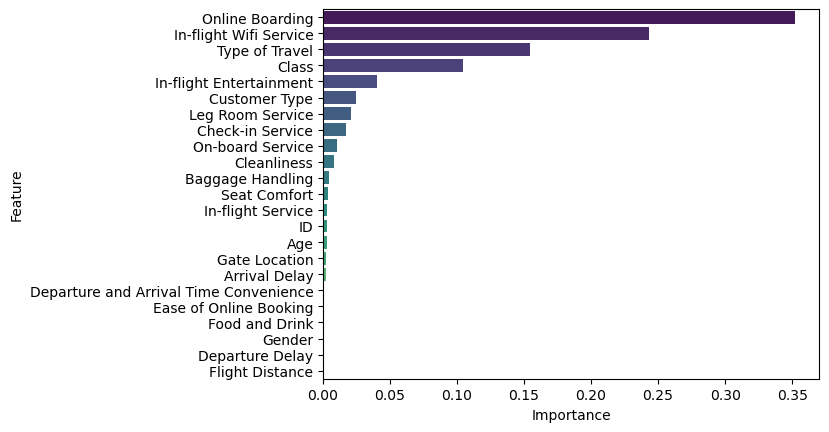

<Figure size 1000x600 with 0 Axes>

In [132]:
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.figure(figsize=(10, 6))
plt.show()